In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics.pairwise import haversine_distances
from math import radians, cos, sin, asin, sqrt

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score

In [28]:
df = pd.read_csv('Patient survival Dataset.csv')

In [29]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [30]:
df.info

<bound method DataFrame.info of        encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250

In [31]:
df.shape

(91713, 186)

In [32]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [33]:
#returns the total number of missing values in the data set
df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [34]:
#descriptive statistics: lambda, format, g= general
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713,91713,91713,91713,87485,88284,91713,90379,91713,91713,...,83766,83766,90998,90998,90998,90998,90998,90998,90998,90998
mean,65606.1,65537.1,105.669,0.0863018,62.3095,29.1858,0.183736,169.642,508.358,0.835766,...,0.0867869,0.0439548,0.000857162,0.0156927,0.225192,0.0129893,0.0261654,0.00706609,0.00413196,0.0206378
std,37795.1,37811.3,62.8544,0.280811,16.7751,8.27514,0.387271,10.7954,228.99,2.48776,...,0.247569,0.217341,0.0292649,0.124284,0.417711,0.113229,0.159628,0.083763,0.0641477,0.142169
min,1,1,2,0,16,14.8449,0,137.2,82,-24.9472,...,-1,-1,0,0,0,0,0,0,0,0
25%,32852,32830,47,0,52,23.642,0,162.5,369,0.0354167,...,0.02,0.01,0,0,0,0,0,0,0,0
50%,65665,65413,109,0,65,27.6547,0,170.1,504,0.138889,...,0.05,0.02,0,0,0,0,0,0,0,0
75%,98342,98298,161,0,75,32.9302,0,177.8,679,0.409028,...,0.13,0.06,0,0,0,0,0,0,0,0
max,131051,131051,204,1,89,67.815,1,195.59,927,159.091,...,0.99,0.97,1,1,1,1,1,1,1,1


In [35]:
df['encounter_id'].value_counts()

2049      1
118035    1
11567     1
15661     1
5416      1
         ..
66165     1
78451     1
74353     1
76400     1
2047      1
Name: encounter_id, Length: 91713, dtype: int64

In [36]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [37]:
df['readmission_status'].value_counts()

0    91713
Name: readmission_status, dtype: int64

## Naming columns

In [38]:
identifiers = df.columns[0:3] 
demographic = df.columns[4:19]
APACHEcovariate = df.columns[20:47]
vitals = df.columns[48:99]
labs=df.columns[100:159]
labsbloodgas=df.columns[160:175]
APACHEprediction=df.columns[176:177]
APACHEcomorbidity=df.columns[178:185]
APACHEgrouping=df.columns[186:187]

In [39]:
identifiers

Index(['encounter_id', 'patient_id', 'hospital_id'], dtype='object')

In [40]:
demographic

Index(['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type',
       'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight',
       'albumin_apache'],
      dtype='object')

In [41]:
APACHEcovariate

Index(['apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache',
       'sodium_apache', 'temp_apache', 'urineoutput_apache',
       'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max'],
      dtype='object')

In [42]:
vitals

Index(['d1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max',
       'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
       'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max',
       'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_sysbp_invasive_max'

In [43]:
labsbloodgas

Index(['d1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max',
       'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min',
       'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max',
       'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min',
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min',
       'apache_4a_hospital_death_prob'],
      dtype='object')

In [44]:
df['icu_type']

0               CTICU
1        Med-Surg ICU
2        Med-Surg ICU
3               CTICU
4        Med-Surg ICU
             ...     
91708     Cardiac ICU
91709    Med-Surg ICU
91710    Med-Surg ICU
91711    Med-Surg ICU
91712    Med-Surg ICU
Name: icu_type, Length: 91713, dtype: object

In [45]:
df.corr() 

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
encounter_id,1.000000,-0.009575,-0.004532,-0.005243,-0.003990,-0.001068,0.002036,-0.005400,-0.000992,-0.000570,...,-0.000513,0.000344,0.001907,0.007601,0.003402,-0.000972,-0.001707,-0.002172,-0.001176,-0.004646
patient_id,-0.009575,1.000000,-0.007075,0.004877,0.006343,-0.001380,0.001387,0.002902,-0.001770,-0.004412,...,0.003735,0.001625,-0.002426,0.001307,0.000434,-0.001667,0.000548,0.000844,0.002333,-0.003065
hospital_id,-0.004532,-0.007075,1.000000,-0.001255,-0.008673,0.012874,0.052123,0.027895,0.004526,-0.001285,...,-0.006993,-0.000283,-0.004947,0.002962,0.011978,0.001362,0.000146,-0.002992,0.002588,-0.004730
hospital_death,-0.005243,0.004877,-0.001255,1.000000,0.111017,-0.031247,-0.093574,-0.019526,0.000994,0.063316,...,0.311043,0.283913,0.004403,0.039453,-0.015784,0.038864,0.043973,0.029788,0.018722,0.051105
age,-0.003990,0.006343,-0.008673,0.111017,1.000000,-0.087077,0.067320,-0.109937,-0.024257,0.049872,...,0.143167,0.076275,-0.029477,-0.028065,0.077908,-0.020061,0.025007,0.030310,0.023335,0.025924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hepatic_failure,-0.000972,-0.001667,0.001362,0.038864,-0.020061,-0.001855,-0.034700,0.010481,-0.011746,0.015063,...,0.024115,0.026941,0.003273,0.525905,0.010647,1.000000,0.003084,-0.001567,0.001689,0.007240
immunosuppression,-0.001707,0.000548,0.000146,0.043973,0.025007,-0.031144,-0.014695,0.000530,-0.031111,0.032695,...,0.038922,0.026268,0.025781,-0.002971,-0.002502,0.003084,1.000000,0.134934,0.103201,0.269653
leukemia,-0.002172,0.000844,-0.002992,0.029788,0.030310,-0.013375,-0.017587,0.001718,0.001014,0.041853,...,0.044126,0.031966,-0.002471,-0.005373,0.002890,-0.001567,0.134934,1.000000,0.031380,0.006210
lymphoma,-0.001176,0.002333,0.002588,0.018722,0.023335,-0.010017,-0.008215,0.008370,-0.002336,0.013954,...,0.018303,0.011287,0.021529,0.001516,-0.002326,0.001689,0.103201,0.031380,1.000000,0.014749


<AxesSubplot:xlabel='hospital_death', ylabel='age'>

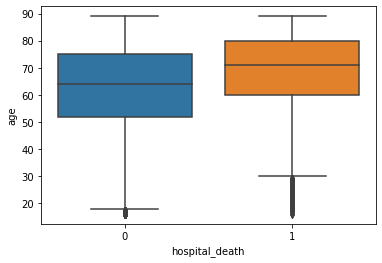

In [46]:
sns.boxplot(x='hospital_death',y='age',data=df)

In [47]:
#dropping indentifiers
df.drop(['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'readmission_status', 'elective_surgery'], axis=1, inplace=True)

In [48]:
df['ethnicity'].value_counts()

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

In [49]:
df = pd.concat([df.drop('ethnicity', axis=1), pd.get_dummies(df['ethnicity'], drop_first=True)], axis=1)
df = pd.concat([df.drop('gender', axis=1), pd.get_dummies(df['gender'], drop_first=True)], axis=1)
df = pd.concat([df.drop('hospital_admit_source', axis=1), pd.get_dummies(df['hospital_admit_source'], drop_first=True)], axis=1)

In [50]:
df.dtypes[df.dtypes == object]

icu_admit_source        object
icu_stay_type           object
icu_type                object
apache_3j_bodysystem    object
apache_2_bodysystem     object
dtype: object

In [51]:
df = df.select_dtypes(exclude=['object'])

In [52]:
df.describe()

,hospital_death,age,bmi,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,ICU,ICU to SDU,Observation,Operating Room,Other,Other Hospital,Other ICU,PACU,Recovery Room,Step-Down Unit (SDU)
count,91713.000000,87485.000000,88284.000000,90379.000000,91713.000000,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,...,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,0.086302,62.309516,29.185818,169.641588,0.835766,84.028340,2.902968,185.401739,558.216377,0.201106,...,0.000382,0.000491,0.000109,0.106713,0.000076,0.017893,0.002541,0.011089,0.031577,0.012332
std,0.280811,16.775119,8.275142,10.795378,2.487756,25.011497,0.681863,86.050882,463.266985,0.400829,...,0.019532,0.022146,0.010442,0.308750,0.008736,0.132562,0.050340,0.104719,0.174871,0.110363
min,0.000000,16.000000,14.844926,137.200000,-24.947222,38.600000,1.200000,101.000000,0.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,23.641975,162.500000,0.035417,66.800000,2.400000,113.000000,203.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,65.000000,27.654655,170.100000,0.138889,80.300000,2.900000,122.000000,409.020000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,32.930206,177.800000,0.409028,97.100000,3.400000,301.000000,703.030000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,67.814990,195.590000,159.090972,186.000000,4.600000,308.000000,2201.050000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df.isnull().sum()

hospital_death             0
age                     4228
bmi                     3429
height                  1334
pre_icu_los_days           0
                        ... 
Other Hospital             0
Other ICU                  0
PACU                       0
Recovery Room              0
Step-Down Unit (SDU)       0
Length: 192, dtype: int64

In [54]:
age_mean = df['age'].mean()

<Figure size 1080x1080 with 0 Axes>

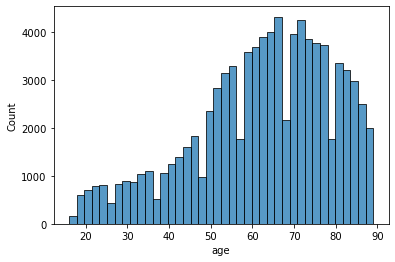

<Figure size 1080x1080 with 0 Axes>

In [55]:
sns.histplot(df['age'], bins=40)
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

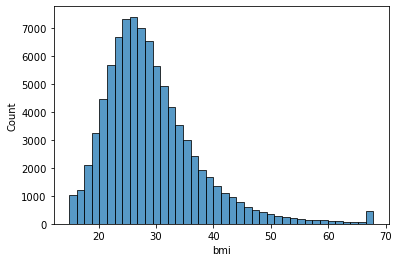

<Figure size 1080x1080 with 0 Axes>

In [57]:
bmi_mean = df['bmi'].mean()
sns.histplot(df['bmi'], bins=40)
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

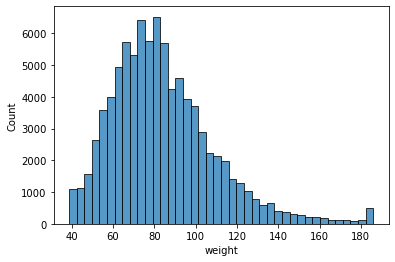

<Figure size 1080x1080 with 0 Axes>

In [58]:
wt_mean = df['weight'].mean()
sns.histplot(df['weight'], bins=40)
plt.figure(figsize=(15,15))

In [59]:
label_names = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100']
cut_points = [0, 20, 30, 40, 50, 60, 70, 80, 100]
df['age_group'] = pd.cut(df['age'], cut_points, labels=label_names)

In [60]:
df = pd.concat([df.drop('age', axis=1), pd.get_dummies(df['age_group'], drop_first=True)], axis=1)
df.drop(['age_group'], inplace=True, axis=1)

<AxesSubplot:xlabel='apache_4a_hospital_death_prob', ylabel='Count'>

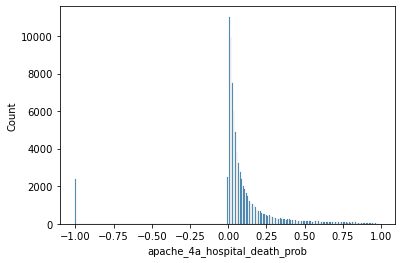

In [61]:
sns.histplot(df['apache_4a_hospital_death_prob'])

In [62]:
df.drop(df[df['apache_4a_hospital_death_prob'] < 0 ].index, inplace=True)

In [63]:
df['apache_4a_hospital_death_prob'].value_counts()

0.01    11023
0.02     9970
0.03     7504
0.04     5996
0.05     4869
        ...  
0.95       22
0.96       21
0.97       11
0.98        5
0.99        1
Name: apache_4a_hospital_death_prob, Length: 100, dtype: int64

C:\Users\PANKAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d1_heartrate_min'>

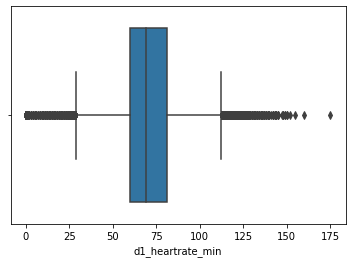

In [64]:
sns.boxplot(df['d1_heartrate_min'])

In [65]:
df.drop(df[df['d1_heartrate_min'] < 25 ].index, inplace=True)
df.drop(df[df['d1_heartrate_min'] > 125 ].index, inplace=True)

C:\Users\PANKAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d1_heartrate_max'>

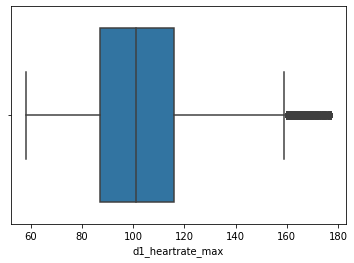

In [66]:
sns.boxplot(df['d1_heartrate_max'])

In [67]:
df.drop(df[df['d1_heartrate_max'] > 160 ].index, inplace=True)

In [68]:
df.duplicated().sum()

0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87142 entries, 0 to 91712
Columns: 198 entries, hospital_death to 80-100
dtypes: float64(169), int64(2), uint8(27)
memory usage: 116.6 MB


# Model and Training


In [70]:
from xgboost import XGBClassifier, plot_importance
xgb_model = XGBClassifier()

In [71]:
X  = df.drop(['hospital_death'], axis=1)
y = df['hospital_death']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['hospital_death'])

In [73]:
xgb_model.fit(X_train, y_train)

C:\Users\PANKAJ\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
predictions=xgb_model.predict(X_test)

In [76]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, classification_report, confusion_matrix

MAE = mean_absolute_error(y_test, predictions)
print(f"mean_absolute_error of model:{MAE}")

mean_absolute_error of model:0.06764587756038785


In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     16047
           1       0.65      0.32      0.43      1382

    accuracy                           0.93     17429
   macro avg       0.80      0.65      0.70     17429
weighted avg       0.92      0.93      0.92     17429



In [78]:
print(confusion_matrix(y_test, predictions))

[[15809   238]
 [  941   441]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

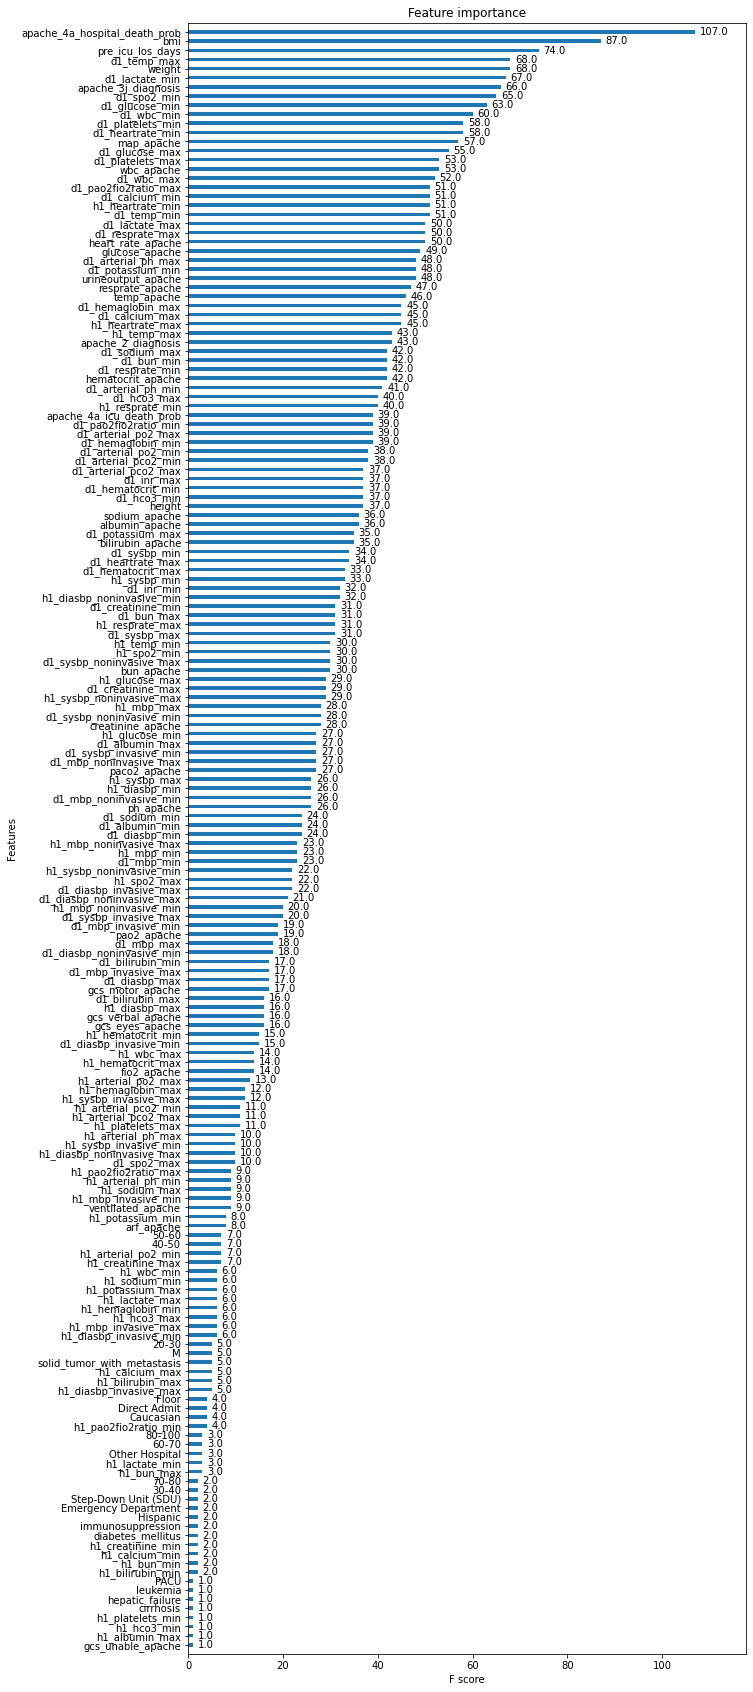

In [79]:
fig, ax = plt.subplots(figsize=(10, 30))
plot_importance(xgb_model, grid=False, height=0.4, ax=ax)